In [71]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [72]:
data = "fc_aul_90cl.dat"

In [73]:
### Read average upper limits from csv file
a = np.genfromtxt(data, delimiter=',')

### Create function from data interpolation
aul = interp1d(a[:,0], a[:,1])

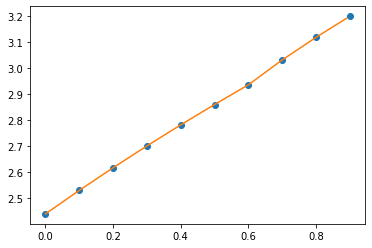

In [74]:
### Plot average upper limit comparing data and interpolation
x = np.arange(0., .9, 0.01)
y = aul(x)
plt.plot(a[:10,0], a[:10,1], 'o', x, y, '-')

In [75]:
### Half-life sensitivity
def sensitivity(exposure, eff, bkg, roi):
    avogadro = 6.02214129E+23
    n_bkg = exposure * bkg * roi
    return math.log(2.) * avogadro * eff * exposure / (135.907214E-3 * aul(n_bkg))

In [79]:
### Standard sensitivity of NEXT-100
exp = 100.  # kg yr
eff = 0.28
bkg = 4.E-4 # counts / kg / yr / keV
roi = 28.   # keV
s0 = sensitivity(exp,eff,bkg,roi)
print(s0)

2.5557946508246975e+25


In [80]:
### Improved sensitivity (CNN paper) of NEXT-100
exp = 100.
eff = 0.28 * 0.65/0.716
bkg = 4.E-4 * (0.09/0.206) 
roi = 28.
s1 = sensitivity(exp,eff,bkg,roi)
print(s1)

2.737973230868098e+25


In [81]:
print(s1/s0)

1.07128060150866
